## Assignment 5

### Name : Harshit Shiroiya
### Email: hshiroiy@iu.edu

This work is solely mine although I have discussed the solution with my paried programming partner Mahadevan Iyer (mahiyer)

## Problem 1: Pattern-matching: The brute-force
### Problem 1.1: The brute-force pattern-matching algorithm [10 pt.]
Describe a text D and a pattern P such that the brute-force pattern-matching algorithm runs in
Ω(dp) time.The lengths of D and P are d and p, respectively.

In [1]:
def brute_force(T,P):
    count=0
    t,p=len(T),len(P)
    for i in range(t-p+1):
        k=0
        while k<p:      
            if T[i+k]==P[k]:
                k+=1
                count+=1
            else: 
                count+=1
                break
            if k==p:         
                return i,count
    return -1,count

In [2]:
a='aaaaaaaae'
b='aae'
print(brute_force(a,b))

(6, 21)


In this example above there are 21 comparisons taking place which is equal to (t-p+1)*p where p is the length of the pattern, t is the length of the text. In the above example where the pattern is 'aae' and the text is 'aaaaaaaae' there are (9-3+1)*3=21 cimparisons taking place. In this particular example the algorithm will perform 3 comparisons for each character in the text (the first two character will match but the third wont) until it reaches 6th index where it will do three comparison and return the index 6 where the pattern starts. Here runtime will be O(tp - p^2 +p). As the size of text grows larger we can igonre the terms p^2 and p and hence we can say that in the above case the runtime of the brute fore will be Ω(tp)

## Problem 1.2: Python’s str class and pattern-matching [20 pt]
In this part, you are asked to modify three pattern matching programs given to you (See appendix). Run your modified programs for varying-length patterns and show your results.
The count method in Python’s str class takes a text D and a pattern P and returns the
maximum number of non-overlapping occurrences of a P within D. As an example ‘cdcdcdcdc’.count(‘cdc’) returns 2.
1. Modify the brute-force pattern-matching to return non-overlapping occurrences of a P
within D.


In [3]:
def find_brute(T, P):
    n, m = len(T), len(P)
    count = 0
    i = 0
    while (i < n - m + 1):
        k = 0
        while k < m and T[i + k] == P[k]:
            k += 1            
        if k == m:
            count += 1
            i += k
        else:
            i += 1
    return count

In [4]:
inputs = ["cdcdcdcdc", "cdc", "aaaaaaaaaaaaaaaaaaa", "aaa"]
for i in range(0, len(inputs) - 1, 2):
    val = 0
    T = inputs[i]
    P = inputs[i + 1]
    print('Text:',T+'  Pattern:',P)
    val += 1
    count = find_brute (T, P)
    print('Non-overlapping occurrences using Brute Force =',count)
    print('Number of non-overlapping occurrences using in-built function =',T.count(P))

Text: cdcdcdcdc  Pattern: cdc
Non-overlapping occurrences using Brute Force = 2
Number of non-overlapping occurrences using in-built function = 2
Text: aaaaaaaaaaaaaaaaaaa  Pattern: aaa
Non-overlapping occurrences using Brute Force = 6
Number of non-overlapping occurrences using in-built function = 6


2. Similar to the previous question (Problem 1.2.1), do the same on the Boyer-Moore program.

In [5]:
# Boyer - Moore
def find_boyer_moore(T, P):
    n, m = len(T), len(P)
    count = 0
    if m == 0:
        return 0  
    last = {}
    for k in range(m):
        last[P[k]] = k
    i = m - 1
    k = m - 1
    
    while i < n:
        if T[i] == P[k]:
            if k == 0:
                count += 1
                k = m-1
                i = i + 2*m -1 
            else:
                i -= 1
                k -= 1
                
        else:
            j = last.get(T[i], -1)
            i += m - min(k, j + 1)
            k = m - 1
            
    return count

In [6]:
inputs = ["cdcdcdcdc", "cdc", "aaaaaaaaaaaaaaaaaaa", "aaa"]
for i in range(0, len(inputs) - 1, 2):
    T = inputs[i]
    P = inputs[i + 1]
    print('Text:',T+'  Pattern:',P)
    count = find_boyer_moore(T, P)
    print('Non-overlapping occurrences using Brute Force =',count)
    print('Number of non-overlapping occurrences using in-built function =',T.count(P))

Text: cdcdcdcdc  Pattern: cdc
Non-overlapping occurrences using Brute Force = 2
Number of non-overlapping occurrences using in-built function = 2
Text: aaaaaaaaaaaaaaaaaaa  Pattern: aaa
Non-overlapping occurrences using Brute Force = 6
Number of non-overlapping occurrences using in-built function = 6


3. Similar to problem 1.2.1, modify the KMP program

In [7]:
# KMP failure function
def compute_kmp_fail1(P):
    m = len(P)
    fail = [0] * m
    j = 1
    k = 0
    while j < m:
        if P[j] == P[k]:
            fail[j] = k+1
            j += 1
            k += 1
        elif k > 0:
            k = fail[k-1]
        else:
            j += 1
    return (fail)

In [8]:
# KMP
def find_kmp(T, P):
    n, m = len(T), len(P)

    if m == 0:
        return 0
    
    fail = compute_kmp_fail1(P)
    
    count = 0
    j = 0
    k = 0
    while j < n:
        if T[j] == P[k]:
            if k == m-1:
                count +=1
                k = 0
                j+=1
            j += 1
            k += 1
        elif k > 0:
            k = fail[k-1]
        else:
            j += 1
    if count>0:
        return count
    return -1

In [9]:
inputs = ["cdcdcdcdc", "cdc", "aaaaaaaaaaaaaaaaaaa", "aaa"]
for i in range(0, len(inputs) -1 , 2):
    T = inputs[i]
    P = inputs[i + 1]
    print('Text:',T+'  Pattern:',P)
    count = find_kmp(T, P)
    print('Non-overlapping occurrences using Brute Force =',count)
    print('Number of non-overlapping occurrences using in-built function =',T.count(P))

Text: cdcdcdcdc  Pattern: cdc
Non-overlapping occurrences using Brute Force = 2
Number of non-overlapping occurrences using in-built function = 2
Text: aaaaaaaaaaaaaaaaaaa  Pattern: aaa
Non-overlapping occurrences using Brute Force = 6
Number of non-overlapping occurrences using in-built function = 6


## Problem 2: Experimental Analysis of Pattern-Matching Algorithms
Perform an experimental analysis of pattern matching algorithms in terms of:

1. Number of character comparison: Perform an experimental analysis of the efficiency of
the brute-force, the KMP and Boyer-Moore pattern matching algorithms for varying-length
patterns.

2. Relative speed comparison: Perform an experimental comparison of the brute-force, KMP,
and Boyer-Moore pattern-matching algorithms. Run each algorithm against large text documents using varying-length patterns and report the relative running times.

Brute Force

In [10]:
def brute_force(T, P):
    t = len(T)
    p = len(P)
    Count = 0
    
    for i in range(t - p + 1):
        k = 0
        if T[i+k] != P[k]:
            Count += 1
        while k < p and T[i+k] == P[k]:
            Count += 1
            k += 1
        if k == p:
            return (i,Count)
    return (-1, Count)

In [11]:
print(brute_force("aaaaaaaaaaaaaaaaaae", "aae"))

(16, 35)


Boyer - Moore

In [12]:
def Boyer_Moore(T, P):
    n = len(T)
    m = len(P)
    
    if m == 0:
        return 0
    last = {}
    for k in range(m):
        last[P[k]] = k
    
    i = m-1
    k = m-1
    count = 0
    while i < n:
        count += 1
        if T[i] == P[k]:
            if k == 0:
                return (i, count)
            else:
                i -= 1
                k -= 1
        else:
            j = last.get(T[i], -1)
            i += m - min(k, j+1)
            k = m-1
    return (-1, count)

In [13]:
print(Boyer_Moore("aaaaaaaaaaaaaaaaaae", "aae"))

(16, 19)


KMP

In [14]:
def compute_kmp_fail(P, count):
    m = len(P)
    fail = [0] * m
    j = 1
    k = 0
    while j < m:
        if P[j] == P[k]:
            count += 1
            fail[j] = k+1
            j += 1
            k += 1
        elif k > 0:
            k = fail[k-1]
        else:
            j += 1
    return (fail, count)

In [15]:
def find_kmp(T, P):
    n, m = len(T), len(P)
    count = 0
    if m == 0:
        return 0
#     print(compute_kmp_fail(P, count))
    fail, count = compute_kmp_fail(P, count)
    j = 0
    k = 0
    count = 0
    while j < n:
        count += 1
        if T[j] == P[k]:
            if k == m-1:
                return (j-m+1, count)
            j += 1
            k += 1
        elif k > 0:
            k = fail[k-1]
        else:
            j += 1
    return (-1, count)

In [16]:
print(find_kmp("aaaaaaaaaaaaaaaaaae", "aae"))

(16, 35)


In [17]:
def comp(T, P):
    start = time.time()
    idx, count = brute_force(T, P)
    end = time.time()
    brute_count.append(count)
    brute.append(end-start)
    
    start = time.time()
    idx, count = Boyer_Moore(T, P)
    end = time.time()
    boyer_count.append(count)
    boyer.append(end-start)

    start = time.time()
    idx, count = find_kmp(T, P)
    end = time.time()
    kmp_count.append(count)
    kmp_1.append(end-start)

In [18]:
import random
import string
import time
l = "XYZW"
l = string.ascii_letters

def generate_random_strings(letters, size):
    return ''.join(random.choice(letters) for i in range(size))

random_string = generate_random_strings(l, 10**5)

In [19]:
input_string = []
brute_count = []
boyer_count = []
kmp_count = []

brute = []
boyer = []
kmp_1 = []

for i in range(1000,100000,1000):
    input_string.append(i)
    pattern = generate_random_strings("ABCDEFCFF", i)
    test_string = random_string + pattern
    comp(test_string, pattern)

In [20]:
import matplotlib.pyplot as plt
def plot(bf, bm, kmp, inp):
    plt.plot(input_string, brute, label = "Brute Force")
    plt.plot(input_string, boyer, label = "Boyer More")
    plt.plot(input_string, kmp_1, label = "KMP")
    plt.xlabel("Input length")
    plt.ylabel("Execution time")
    plt.legend()
    plt.show()

### Character comparison in three algorithms

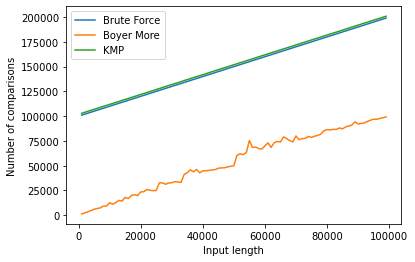

In [21]:
plt.plot(input_string, brute_count, label = "Brute Force")
plt.plot(input_string, boyer_count, label = "Boyer More")
plt.plot(input_string, kmp_count, label = "KMP")
plt.xlabel("Input length")
plt.ylabel("Number of comparisons")
plt.legend()
plt.show()

From the above graph we see that the number of comparisons made in Brute force and KMP is almost similar. But Boyer Moore makes far fewer comparisons than both Brute force and KMP 

### Execution time comparison

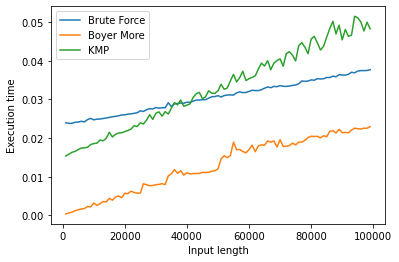

In [22]:
plot(brute, boyer, kmp_1, input_string)

From the above graph we see that brute force performs better when the length of the input is greater. For smaller inputs KMP outperforms brute force.
On the other hand Boyer Moore outperforms both KMP as well as brute force

In [23]:
import sys
import os
import re
import math
import time
import matplotlib.pyplot as plt
import random

## Problem 3: Matrix-chain Multiplication

The matrix-chain multiplication problem: Given a chain of < D1, D2, . . . , Dn > of n matrices fully
parenthesize the product < D1 ·D2 ···Dn > in a way so that the number of scalar multiplications
is minimized. Each Di has a pi−1 × pi dimension and i = 1, 2, . . . , n.
1. The Brute-Force: [10 pt.]: Implement a Python program to solve the matrix-chain multipli-
cation problem by the brute force algorithm.
2. Bottom-up Dynamic Programming [20 pt.]: Implement a Python program to solve the
matrix-chain multiplication problem using bottom-up dynamic programming approach.
3. Dynamic Programming with Memoization [Extra Credit, 10 pt.]: Implement a Python pro-
gram to solve the matrix-chain multiplication problem using dynamic programming with
memoization.

In [24]:

# 1. Brute Force
def Matrix_chain_brute(A,i,j):
    if i == j:
        return 0
    temp = sys.maxsize
    for k in range(i, j):
        count = (Matrix_chain_brute(A, i, k) + Matrix_chain_brute(A, k + 1, j)+ A[i-1] * A[k] * A[j])
        if count < temp:
            temp = count
    return temp


A = [25,15,20,30,45,5,10]
n = len(A) - 1
print("Matrix Chain Multiplication using Brute Force: ",Matrix_chain_brute(A,1,n))


Matrix Chain Multiplication using Brute Force:  14375


In [25]:
# 2. Bottom Up Dynamic Programming
def parenthesis(A,i,j):
    if i==j:
        print("A{0}".format(i), end= "") 
    else :
        print("(", end= "")
        parenthesis(A,i,A[i][j])
        parenthesis(A,A[i][j] +1 ,j)
        print(")", end= "")
        
def Matrix_chain_Dynamic(A,n):
    array  = [[0 for x in range(n)] for x in range(n)]
    array_s  = [[0 for x in range(n)] for x in range(n)]
    for i in range(1, n):
        array[i][i] = 0
    
    for L in range(2, n):
        for i in range(1, n-L + 1):
            j = i + L-1
            array[i][j] = sys.maxsize
            for k in range(i, j):          
                q = array[i][k] + array[k + 1][j] + A[i-1]*A[k]*A[j]
                if q < array[i][j]:
                    array_s[i][j] = k
                    array[i][j] = q
    
    
    return array[1][n-1]


A = [25,15,20,30,45,5,10]
n = len(A) 
# parenthesis(array_s,0,n-1)
# print("\n Optimal Number of Multiplication is :", array_s[0],[n - 1])
print("\n Matrix Chain Multiplication using Dynamic Programming: ",Matrix_chain_Dynamic(A,n))



 Matrix Chain Multiplication using Dynamic Programming:  14375


In [26]:
# 3. Memoization

A = [[-1 for i in range(100)] for j in range(100)]
 

def Matrix_chain_Memoised(p, i, j):
    if(i == j):
        return 0
     
    if(A[i][j] != -1):
        return A[i][j]
     
    A[i][j] = sys.maxsize
     
    for k in range(i,j):
        A[i][j] = min(A[i][j], Matrix_chain_Memoised(p, i, k) + Matrix_chain_Memoised(p, k + 1, j)+ p[i - 1] * p[k] * p[j])
#         print(A[i][j])
    return A[i][j]
 
def Matrix_chain(p):
    i = 1
    j = n - 1   
    return Matrix_chain_Memoised(p, i, j)

# For this Problem we Referred https://www.geeksforgeeks.org/matrix-chain-multiplication-dp-8/
Y = [25,15,20,30,45,5,10]
# n = len(Y)
print("Minimum number of multiplications is",Matrix_chain(Y))


Minimum number of multiplications is 14375


Matrix Chain Multipliaction Using Brute Force takes 0.000027s to run for size 5
Matrix Chain Multipliaction Using Dynamic Programming takes 0.000019s to run for size 5
Matrix Chain Multipliaction Using Memoization takes 0.000002s to run for size 5

Matrix Chain Multipliaction Using Brute Force takes 0.000199s to run for size 7
Matrix Chain Multipliaction Using Dynamic Programming takes 0.000030s to run for size 7
Matrix Chain Multipliaction Using Memoization takes 0.000001s to run for size 7

Matrix Chain Multipliaction Using Brute Force takes 0.001605s to run for size 9
Matrix Chain Multipliaction Using Dynamic Programming takes 0.000054s to run for size 9
Matrix Chain Multipliaction Using Memoization takes 0.000001s to run for size 9

Matrix Chain Multipliaction Using Brute Force takes 0.014695s to run for size 11
Matrix Chain Multipliaction Using Dynamic Programming takes 0.000096s to run for size 11
Matrix Chain Multipliaction Using Memoization takes 0.000002s to run for size 11

M

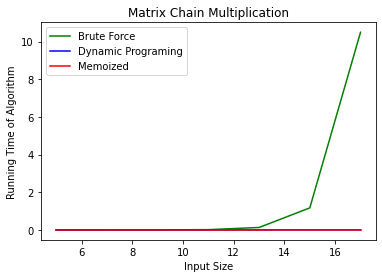

In [27]:
brute = []
dynamicP = []
memoized = []
size = 5
li = []

for i in range(1,8):
    res = random.sample(range(1, 100), size)
    li.append(len(res))
    
    start = time.time()
    Matrix_chain_brute(res,0, len(res) - 1)
    end = time.time()
    brute.append(end - start)
    print("Matrix Chain Multipliaction Using Brute Force takes {:f}s to run for size {:d}".format(end-start,len(res)))
    
    start = time.time()
    Matrix_chain_Dynamic(res,len(res))
    end = time.time()
    dynamicP.append(end-start)
    print("Matrix Chain Multipliaction Using Dynamic Programming takes {:f}s to run for size {:d}".format(end-start,len(res)))
    
    start = time.time()
    Matrix_chain(res)
    end = time.time()
    memoized.append(end - start)
    print("Matrix Chain Multipliaction Using Memoization takes {:f}s to run for size {:d}".format(end-start,len(res)))
    print()
    size += 2


plt.plot(li, brute, color = 'green', label = 'Brute Force')
plt.legend()

plt.plot(li, dynamicP, color = 'blue', label = 'Dynamic Programing')
plt.legend()

plt.plot(li, memoized, color = 'red', label = 'Memoized')
plt.legend()

plt.xlabel('Input Size')
plt.ylabel('Running Time of Algorithm')
plt.title('Matrix Chain Multiplication')
plt.show()

While Comparing the three algorithm, We observed that Matrix Chain Multipliation when Applied with Dynamic Programming and Memoized Dynamic Programming gives the optimal Solution. While, Brute force takes a lot of time as compared to other two. Hence Both Dynamic and Memoized Dynamic Programming Algorithm are optimal for Matrix Chain Multipliation

## Problem 4: Longest Common Sub-sequence (LCS) Problem

Implement a Python program to solve LCS problem using dynamic programming. Run your
program to find the best sequence alignment between DNA strings. Show your results.
Longest Common Sub-sequence (LCS) problem: Given two character strings over some
alphabet, find a longest string that is a sub-sequence of given two strings.
Data source: https://www.ncbi.nlm.nih.gov/genbank/

### Solution:

In [28]:
def lcs(s1,s2):
    x = len(s1)
    y = len(s2)

    array_lcs =[[0]*(x+1) for _ in range(y+1)]
    for i in range(1,y+1):
        for j in range(1,x+1):
          
            if s1[j-1]==s2[i-1]:
                array_lcs[i][j] = 1 + array_lcs[i-1][j-1]
            else:
                array_lcs[i][j] = max(array_lcs[i][j-1],array_lcs[i-1][j])
    print("The length of the Longest Common Sub-sequence = " ,array_lcs[x][y])
    
    
    if array_lcs[y][x]>0:
        subseq = ""
        i=y
        j=x
        while i!=0 and j!=0:
            if s1[j-1]==s2[i-1]:
                subseq+=s1[j-1]
                i-=1
                j-=1
            elif array_lcs[i-1][j]>=array_lcs[i][j-1]:
                i-=1
            else: 
                j-=1
        print("The Longest Common Sub-sequence = ",subseq[::-1])
    
    else: print("No common Sub-Sequence found")

        
text1 = "gatcctccatatacaacggtatctccacctcaggtttagatctcaacaacggaaccattg"
text2 = "ccgacatgagacagttaggtatcgtcgagagttacaagctaaaacgagcagtagtcagct" 
lcs(text1,text2)



The length of the Longest Common Sub-sequence =  39
The Longest Common Sub-sequence =  cccataacaaggtatctcaggttaactaaaacgacattg
